# Creating Customer Segments
## Alfred Hung
## January 2017

## Introduction

In this project, we will analyze a dataset containing data on various customers' annual spending amounts of diverse product categories. A goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so it would equip the distributor with insights into how to best structure its delivery service to meet the needs of each customer.

The features `'Channel'` and `'Region'` will be excluded in the analysis with focus instead on the six product categories recorded for customers.

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we explore the data through visualizations and code to understand how each feature is related to the others. We describe basic statistics of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset to track through the course of the project.

The dataset is composed of six important product categories: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Data Samples
To get a better understanding of the customers and how their data will transform through the analysis, I will select three sample data points which vary significantly from one another. They will represent the customers to track.

In [3]:
# Select three indices from the dataset
import random
random.seed(888)
indices = random.sample(np.arange(440+1),3)

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,688,5491,11091,833,4239,436
1,8475,1931,1883,5004,3593,987
2,25606,11006,4604,127,632,288


### Customer sample representation
We analyze the kind of establishment (eg. markets, cafes, retailers, etc) the three samples may represent by considering their total purchase cost of each product category and their statistical descriptions.

**Customer 0**:

The data suggests that this client could be a large grocery store.  Its main purchases are (in descending order) Grocery, Milk and Detergents_Paper, with the first and the third products being well above their medians (50% quartile) and above their 75% quartiles. Milk is in between the 50% and 75% quartile.

**Customer 1**:

The data suggests that this client could be a medium-size retailer. Its main purchases are fresh produce, frozen, and detergent paper, with the last two products having values above their medians. Fresh has the largest total purchase of all categories and is at the median (8504). Frozen is above the 75% quartile (3554), Detergents_Paper is near the 75% quartile (3922), and Delicatessen is at the median (965).

**Customer 2**:

The data suggests that this client could be a large fresh produce market. Its main staples are fresh produce and milk with consumptions well above their medians and 75% quartiles while the other 5 products are well below their medians.

### Customer sample representation: Feature Relevance
We want to explore whether one of the six product categories is actually relevant for understanding customer purchasing. That is to say, if it is possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products. We will determine this by training a Decision Tree regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [4]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(labels=['Grocery'], axis=1)

# Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split
y_true = data['Grocery']
rs = 42
X_train, X_test, y_train, y_test = train_test_split(new_data, y_true, test_size=0.25, random_state=rs)

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=rs)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "The score of the prediction using the testing set is {:,.4f}".format(score)

The score of the prediction using the testing set is 0.6819


### Customer sample representation: Analysis

Feature 'Grocery' was the target product used for prediction. Its coefficient of determination, `R^2`, is 0.6819 meaning that 68.19% of the variance of the target output 'Grocery' around its mean is predicted by the model. The somewhat high score seems to indicate that 'Grocery' could be redundant if reintroduced into the model, and that the remaining features should be enough to predict a customer's spending habit on 'Grocery'. Additionally, the feature importances of the model (see below) show that Detergents_Paper plays a significant role in predicting Grocery (0.8911) and it's confirmed  by the high correlation coefficient between the two of them (0.9246).  Milk also has a high correlation (0.7283) with Grocery and by being in the model it assists in giving its prediction score of 0.6819.

Another way to check that Grocery is not relevant for identifying a specific customer is given by the Visualization of Feature Distributions shown further below.  In the row for Grocery, we see that the scatter data points for both Milk and Detergents_Paper could be fitted with imaginary straight lines with the slope for Detergents_Paper steeper than that for Milk. As the data values for Milk and Detergents_Paper increase the values of Grocery move up in tandem suggesting a lineal correlation between them. The tighter looking data points for the Grocery-Detergents_Paper evidence the higher correlation between them while the more disperse data points for Grocery-Milk evidence the larger variability and lesser correlation between these two features, confirming their correlation coefficients. 

Before deleting any feature, it'd help to check the model's residual plot, and/or to perform Principal Component Analysis to draw out the most critical features and their relative weights.  Having checked `R^2`, feature importances, correlation coefficients and feature distributions, their results suggest that Grocery can be predicted by the purchase of other category of product such as Detergents_Paper.

In [5]:
# Degree of importance of each feature to predict target 'Grocery'
print "Degrees of importance of each feature to predict the target Grocery:\nFresh {:,.4f}\n".format(regressor.feature_importances_[0]), "Milk {:,.4f}\n".format(regressor.feature_importances_[1]), "Frozen {:,.4f}\n".format(regressor.feature_importances_[2]), "Detergents_Paper {:,.4f}\n".format(regressor.feature_importances_[3]), "Delicatessen {:,.4f}\n".format(regressor.feature_importances_[4])
# Check degree of correlation among features
print "Correlation table among all features:"
data.corr()

Degrees of importance of each feature to predict the target Grocery:
Fresh 0.0169
Milk 0.0460
Frozen 0.0208
Detergents_Paper 0.8911
Delicatessen 0.0252

Correlation table among all features:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Feature Distribution Visualization
To get a better understanding of the dataset, we construct a scatter matrix of each of the six product features present in the data. We can see that the 'Grocery' feature is relevant for identifying a specific customer in the quadrants where the scatter matrix below may not show any correlation between that feature and the others (Fresh, Frozen and Delicatessen). Conversely, 'Grocery' is not relevant for identifying a specific customer where the scatter matrix shows a correlation between that feature and another feature in the data (Milk and Detergents Paper).

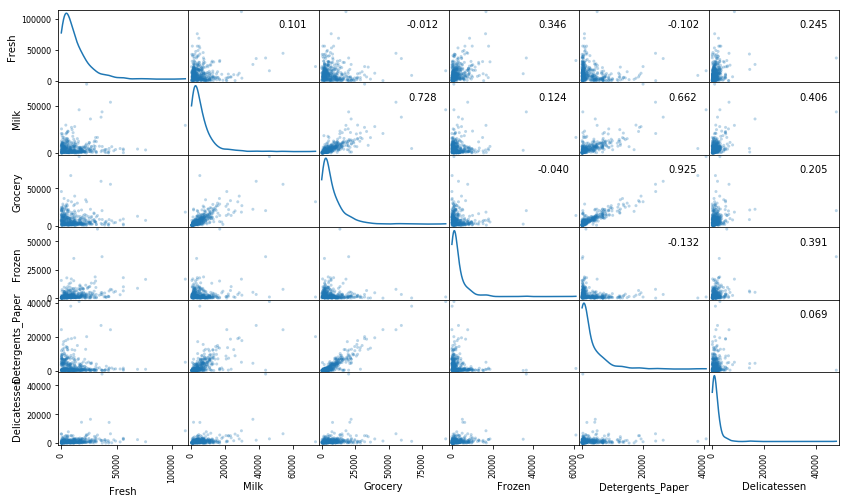

In [6]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
# Format feature correlations for plotting
corr = data.corr().as_matrix()
# Plot scatter matrix with correlation numbers on upper right hand corner
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Feature Distribution Visualization: Further analysis

The correlation between 'Grocery' and the other two features ('Milk', 'Detergents_Paper') implies that as purchases of 'Milk' or 'Detergents_Paper' increase so does 'Grocery', however, such a direct relationship does not hold for the other three features (Fresh, Frozen and Delicatessen). That these two features are correlated with 'Grocery' confirms the high R^2 of 68.19% and that Grocery is not as relevant to identify a specific customer since Milk and Detergents_Paper can do that within a model. As an additional note, Milk also exhibits a correlation (0.6618 - see previous correlation matrix) with Detergents_Paper but with a more disperse set of data points.

The data for Grocery, Milk and Detergents_Paper are not normally distributed but skewed to the right due to a few extreme outliers. Most of the data points lie close to the origin, in the few thousands of units.  The asymmetry is even more pronounced with the other three features (Fresh, Frozen, Delicatessen) where more data points are concentrated at the beginning values. The skewness coefficients(see below) show that the order of features with more weight in the left tail of their distributions are: Milk (4.053), Detergents_Paper (3.6318) and Grocery (3.5874). 

In [7]:
# Display skewness values for all features
data.skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

## Data Preprocessing
In this section, we preprocess the data to create a better representation of customers by performing a scaling on the data and detecting and removing outliers.

### Preprocessing: Feature Scaling
In the previous gragh we saw how the data is not normally distributed which is also evidenced by the mean and median varying significantly, indicating a large skew. To reduce this skewness we apply a non-linear scaling resulting in the below transformation:

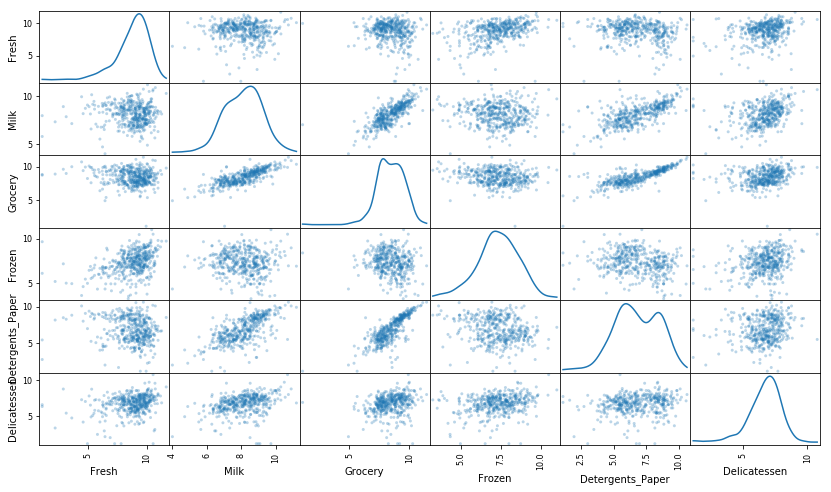

In [26]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Analysis
After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal. For any pairs of features identified earlier as being correlated, we can observe here that the correlations for 'Grocery' are still present and are now stronger than before.

Below is the sample data after having the natural logarithm applied to it:

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.533789,8.610866,9.313889,6.725034,8.352083,6.077642
1,9.044876,7.565793,7.540622,8.517993,8.186743,6.894670
2,10.150582,9.306196,8.434681,4.844187,6.448889,5.662960


### Preprocessing: Outlier Detection
The detection of outliers in the data is to minimize the skewing of results which take into consideration these data points. We will use Tukey's Method for identfying outliers. A data point with a feature is considered abnormal when it is beyond an outlier step of the interquartile range (IQR) for that feature. An outlier step is calculated as 1.5 times the IQR. 

In [10]:
# Initialize outlier list
outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    out_list = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out_list)
    outliers.extend(list(out_list.index))
    
# Select the indices for data points you wish to remove
# Select data points whose features have more than one outlier
dup = list(sorted(set([x for x in outliers if outliers.count(x) > 1])))
# Sort, delete duplicates from outlier index then put back into a list
outliers = list(set(sorted(outliers)))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Outlier Detection: Analysis

There are 42 total outliers and five data points (indexes 65, 66, 75, 128, 154) with outliers for more than one feature. 

From the below table which shows monetary units, customer 65 is an outlier for Fresh and Frozen and customer 75 for Grocery and Detergents_Paper due to their numbers being very near their features' lower limits. However, they are also examples of specialized stores where customer 65 sells mostly Milk and Detergents_Paper and customer 75 sells mostly Fresh and Frozen. More importantly, they are among the best customers the wholesaler has since client 65's purchases of Milk and Grocery are 2-3 standard deviations from the mean while client 75's purchase of Fresh is about one standard deviation from the mean.  

Clients 66 and 128 have outliers in Fresh and Delicatessen also because of their very low numbers. 66 specializes in Grocery and Detergents_Paper while 128 in Milk and Grocery. Their main purchases are near their feature means within a standard deviation. They are a kind of client who buys an important volume of products in 2-3 categories and are part of the specialty stores in the middle range of purchases. 

Lastly, client 154 has outliers in Milk, Grocery and Delicatessen. It purchases little in all features and it's part of a group of very small store clients which includes outliers 98, 184, 203, 355 with total sales ranging from 2476 to 6374. There are enough number of them that they altogether represent an important clientele and should not be dismissed in any delivery strategy.

The data points with outliers for more than one feature are not much different than those of outliers for only one feature in the sense that they both affect the centroids of the soon-to-be-calculated clusters. Unlike the data with one outlier, they, however, affect the centroids with twice the pulling power, that is, they act as two outliers in one.  These 5 double-outliers data points are equivalent to 10 single outliers. By themselves, they are a small number compared to the 37 remaining outliers and do not particularly affect the final result much. We can see this by running the further-down clustering algorithm and calculating centroids for three scenarios: no outliers removed, only duplicate outliers removed and all outliers removed.  As we wish to remove undesired centroid influencers, the point is to remove not just a few outliers but all of them regardless of the double weight a few may carry. 

These centroids represent the average customer spending of each segment.  As such, the objective is to include only data points that are representative of the clusters. The outliers, which make up 9.55% (42/440) of the total number of observations, distort this average disproportionately making it appear larger than what it actually is. Comparing each feature's mean against its median (see below calculations), their means are substantially larger than their medians due to the pulling up of a group of clients with large purchases.  In the below boxplot, it can be seen how the outliers are spread out over an area much larger than the 1.5 IQR of each feature.  Eliminating these 42 outliers would provide a better representation of the majority of clients, their average spending and the right coordinates of their clusters' centroids. 

In [11]:
# Total number of outliers
print "The total number of outliers is {}".format(len(outliers))
# Show data point indexes that have more than one outlier in their features
print "The data points with more than one outlier in their features are: {}".format(dup)
# Display data points in monetary units
print "Their purchases in monetary units:"
display(data.iloc[dup,])
# Display feature means for comparison
print "The mean of each feature:"
display(data.mean())
# Display difference between mean and median for all features
print "Difference between the mean and median of each feature:"
display(data.mean()-data.median())
# Display feature standard deviations for comparison
print "The standard deviation of each feature:"
display(data.std())

The total number of outliers is 42
The data points with more than one outlier in their features are: [65L, 66L, 75L, 128L, 154L]
Their purchases in monetary units:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8


The mean of each feature:


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Difference between the mean and median of each feature:


Fresh               3496.297727
Milk                2169.265909
Grocery             3195.777273
Frozen              1545.931818
Detergents_Paper    2064.993182
Delicatessen         559.370455
dtype: float64

The standard deviation of each feature:


Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

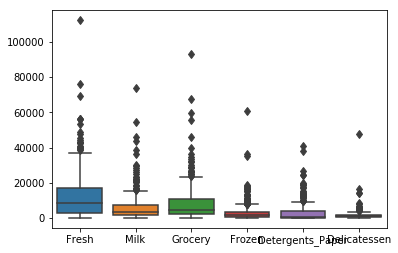

In [12]:
# Import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot for all features showing the interquartile range (between 25% and 75%), the median, and the outliers
sns.boxplot(data=data, orient="v", fliersize=6, whis=1.5)

The points outside each boxplot's whiskers are the features' outliers.

## Feature Transformation
In this section we use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. PCA calculates the dimensions which best maximize variance and finds the compound combinations of features that best describe customers.

### Feature Transformation: PCA

After the data has been scaled to a more normal distribution and has had any necessary outliers removed, we apply PCA to the data to discover which dimensions about the data best maximize the variance of features involved. A dimension or component from PCA is a new "feature" of the space, or a composition of the original features present in the data. 

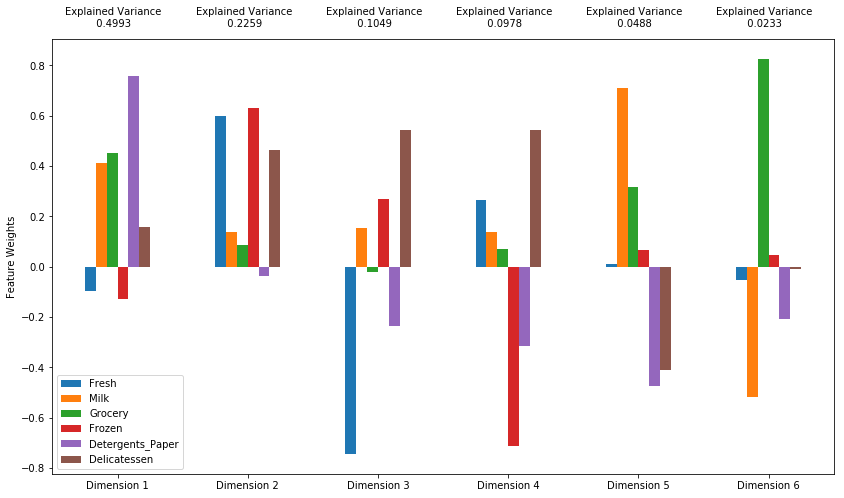

In [13]:
# Import PCA
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### PCA: Analysis

The above graph shows 6 PCA dimensions with their respective feature weights. A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the individual feature weights.

PCA is a procedure that reduces the number of features to a few linear combinations (dimensions) of them so that each dimension is uncorrelated to each other and explains the maximum amount of variance of these variables. These linear combinations or principal components are like multiple regression equations where the variables are the features and their coefficients are calculated weights that account for the maximum variance in the variables. The first component (PCA1) describes the maximum amount of total variance in all the variables where the larger weights (eg. Detergents_Paper, Grocery, Milk) mean that they have the stronger correlations with PCA1. Thus, the bigger these variables are the bigger the component is and viceversa. These variables vary together, that is, the amount of purchase of one affects the amount of purchase of the others. Smaller variables which are nearer to zero (eg. Delicatessen at less than 0.2) are less correlated and consumed on a much smaller scale.  When variables carry a negative sign, such as Fresh and Frozen, the component goes up when these are consumed less.  Each additional component describes the maximum amount of variance that is not accounted for by the previous components and is correlated with variables that do not show strong correlations with the previous components. As we add a dimension, each accounts for less and less of the variance of the total data as can be seen by the progressively smaller Explained Variance numbers in the above graph. Describing 70-80% of the variation in the data should provide enough approximation for the new model and if greater precision is needed we could aim for 90%. 

The first and second principal components explain 5.9450 of the total variance in the data or 72.53% (see below calculations). The project chooses two PCAs which contain all six variables which do not load meaningfully on more than one component easing interpretation.  Each of these two PCAs are exclusive as they measure different constructs.  The first four principal components explain 7.6066 of the total variance in the data or 92.80%, retaining much more information, which is quite satisfactory for four out of six dimensions.

In terms of customer spending, we'll consider a feature weight significant at a cutoff of +/- 0.4 to interpret dimensions:

- Dimension 1: We can view this dimension as an indicator of a Grocery Store or the main products it purchases. A data point that exhibits a positive value for this component means that it consumes mainly and proportionally in Detergents_Paper (0.7595), Grocery (0.4511) and Milk (0.4109). It also means that if the client buys one category it will buy the other two as well. All three products have values above 0.4 but primarily PCA1 is a measure of the consumption of Detergents_Paper since it has the largest weight of all. Sample point 0 is such a case, as described in Question 1 as a store of Grocery, Milk and Detergents_Paper. Its PCA1 is 2.0035 and PCA2 -2.1361 (see below Observation table) meaning that it consumes proportionally the three main products belonging to PCA1 (2.0035*0.7595 for Detergents_Paper, 2.0035*0.4511 for Grocery, 2.0035*0.4109 for Milk) and less of the three main products belonging to PCA2 (-2.1361*0.6300 Frozen, -2.1361*0.6008 Fresh and -2.1361*0.4634 Delicatessen). The feature weights mean that for every 0.7595 in consumption of Detergents_Paper, the client consumes 0.4511 in Grocery and 0.4109 in Milk. From this example, it can be seen that the higher the PCA component the higher the consumption of its products and the more negative the PCA component the less consumption of its products. 

- Dimension 2: We can view this dimension as an indicator of a market of Fresh, Frozen and Delicatessen or of the purchase of these products. A data point that exhibits a positive value for this component means that it consumes mainly and  proportionally in Frozen (0.6300), Fresh (0.6008) and Delicatessen (0.4634). But PCA2 is primarily a measure of the purchase of the first two products as they have the largest feature weights. It also means that if the client buys one category it will buy the other two as well. A pertaining case is sample point 1, a store of fresh produce, frozen, and detergent paper. Its PCA2 (0.5927) is larger than its PCA1 (0.3029) meaning that it purchases more of the products belonging to PCA2 than PCA1 (mainly Detergents_Paper) which is consistent with the description in Q1.

- Dimension 3: We can view this dimension as an indicator of a Fresh produce market. A data point that exhibits a positive value for this component means that it consumes mainly and proportionally in Fresh (0.7452) and less in Delicatessen (-0.5422). But PCA3 is primarily a measure of the purchase of Fresh since it has the largest feature weight. Sample point 2, a retailer of fresh produce and milk, is a representative case of this dimension. It has the largest value for PCA3 (mainly Fresh) at 1.9521 and its PCA5 (mainly Milk) is at 1.3138, confirming the description in Q1.

- Dimension 4: We can view this dimension as an indicator of a retailer of mainly Frozen products. A data point that exhibits a positive value for this component means that it consumes proportionally in Frozen (0.7133) and less in Delicatessen (-0.5445). But PCA4 is primarily a measure of the purchase of Frozen since it has the largest feature weight. 

In [14]:
# Display total variance of the first and second principal component
print "Total variance of the first and second principal component: {:.4f}".format(np.cumsum(pca.explained_variance_)[1])
# Display total variance of the first four principal components
print "Total variance of the first four principal components: {:.4f}".format(np.cumsum(pca.explained_variance_)[3])
# Display variance ratio of the first and second principal component
print "Percent variance of the first and second principal component: {:.2f}%".format(np.cumsum(pca.explained_variance_ratio_)[1]*100)
# Display variance ratio of the first four principal components
print "Percent variance of the first four principal components: {:.2f}%".format(np.cumsum(pca.explained_variance_ratio_)[3]*100)
# Display feature weight for PCA1's Detergents_Paper
print "Feature weight for PCA1's Detergents_Paper: {:.4f}".format(pca.components_[0][4])
# Display feature weight for PCA1's Grocery
print "Feature weight for PCA1's Grocery: {:.4f}".format(pca.components_[0][2])
# Display feature weight for PCA1's Milk
print "Feature weight for PCA1's Milk: {:.4f}".format(pca.components_[0][1])
# Display feature weight for PCA2's Frozen
print "Feature weight for PCA2's Frozen: {:.4f}".format(pca.components_[1][3])
# Display feature weight for PCA2's Fresh
print "Feature weight for PCA2's Fresh: {:.4f}".format(pca.components_[1][0])
# Display feature weight for PCA2's Delicatessen
print "Feature weight for PCA2's Delicatessen: {:.4f}".format(pca.components_[1][5])
# Display feature weights for PCA3's Fresh
print "Feature weight for PCA3's Fresh: {:.4f}".format(pca.components_[2][0])
# Display feature weights for PCA3's Delicatessen
print "Feature weight for PCA3's Delicatessen: {:.4f}".format(pca.components_[2][5])
# Display feature weight for PCA4's Frozen
print "Feature weight for PCA4's Frozen: {:.4f}".format(pca.components_[3][3])
# Display feature weight for PCA4's Delicatessen
print "Feature weight for PCA4's Delicatessen: {:.4f}".format(pca.components_[3][5])

Total variance of the first and second principal component: 5.9600
Total variance of the first four principal components: 7.6258
Percent variance of the first and second principal component: 72.53%
Percent variance of the first four principal components: 92.80%
Feature weight for PCA1's Detergents_Paper: 0.7595
Feature weight for PCA1's Grocery: 0.4511
Feature weight for PCA1's Milk: 0.4109
Feature weight for PCA2's Frozen: 0.6300
Feature weight for PCA2's Fresh: 0.6008
Feature weight for PCA2's Delicatessen: 0.4634
Feature weight for PCA3's Fresh: -0.7452
Feature weight for PCA3's Delicatessen: 0.5422
Feature weight for PCA4's Frozen: -0.7133
Feature weight for PCA4's Delicatessen: 0.5445


### PCA: Sample data
Below we see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.0035,-2.1361,0.8978,-0.8948,0.1140,0.2650
1,0.3029,0.5927,-0.1382,-1.2764,-1.2974,-0.6850
2,0.2694,-1.2483,-1.9521,1.8197,1.3138,-0.7069


By using principal component analysis, we reduce the dimensionality of the data and the complexity of the problem. However, dimensionality reduction comes at a cost. Fewer dimensions used implies less of the total variance in the data is being explained. The benefit is that if a significant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards as we'll show below.

In [16]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

For the sample data, its first two dimensions remain unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0035,-2.1361
1,0.3029,0.5927
2,0.2694,-1.2483


## Biplot Visualization
The biplot shows a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components, in this case `Dimension 1` and `Dimension 2`. In addition, the biplot shows the projection of the original features along the components which help interpret the reduced dimensions of the data and discover relationships between the principal components and original features.

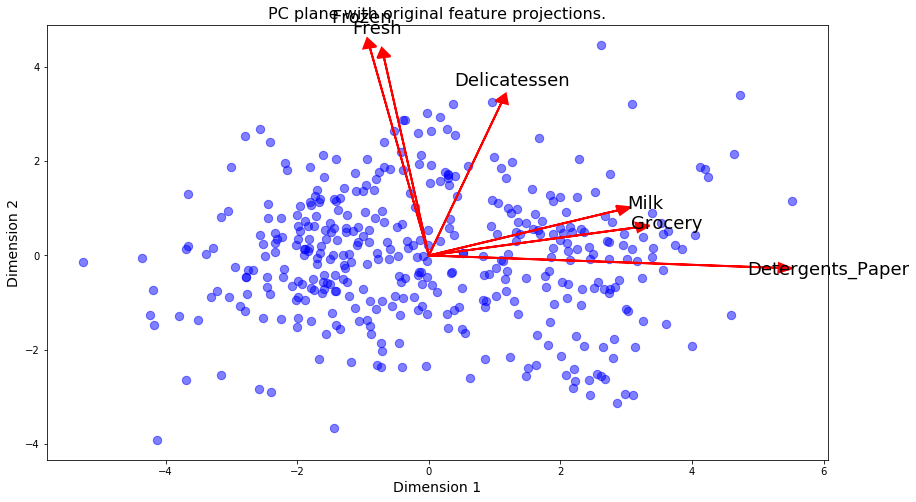

In [27]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Biplot: Interpretation

The original feature projections are in red color. To interpret the relative position of each data point in the scatterplot we can take a point in the lower right corner of the figure which corresponds to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories.

## Clustering

In this section, we discuss modeling of the data using K-Means clustering and Gaussian Mixture Model to identify the various customer segments hidden in the data. Later, we will recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Clustering Analysis: K-Means versus Gaussian Mixture Model 

The advantages of using K-Means are:
- It's a fast algorithm
- It applies to continuous data
- Each data point is assigned to only one cluster (hard partitioning)
- It works well if clusters are nearly spherical, features are independent and have equal variance
- It works well if features are length normalized
- Clusters are non-hierarchical, do not overlap, are of similar size (have roughly equal number of observations) and well separated
- Compared with hierarchical clustering, it's faster when the number of variables are large and k is low, and produces tighter clusters
- It can be used as an initialization procedure for GMM
- It's intuitive, easy to interpret and explain to outside audiences

The advantages of using a Gaussian Mixture Model (GMM) are:
- It is the fastest algorithm among mixture models
- It allows for data points to belong to more than one cluster. Clusters can overlap where each data point has a posterior probability score for different cluster's membership (soft partitioning)
- It allows for clusters to have non-convex shapes since it provides several covariance options (spherical, diagonal, tied or full)
- It can accommodate clusters to have different sizes and correlation structures within them
- K-Means is a special case of GMM where a hard partitioning of GMM leads to K-Means or when GMM is in the small variance limit

Choosing between K-Means and Gaussian Mixture Model:
- After applying non-linear scaling to the data, the data appears more normal however it still is not normally distributed.  Fresh and Grocery appear skewed somewhat to the right. Milk, Grocery and Detergents_Paper show bimodal distributions (see previous scatter matrix of log-scaled features). 
- GMM requires normally distributed data to perform properly.  
- Dimension 1 shows dominance of three features (Milk, Grocery and Detergents_Paper) which should clearly define its clustering
- Dimension 2 is dominated by Fresh, Frozen, and Delicatessen which do not overlap with Dimension 1 permitting a clean definition of its cluster
- K-Means in general is a faster training algorithm than GMM. As the number of clusters increases the time difference between the two also increases
- K-Means seems to be the better algorithm between the two since it's the fastest, can handle better data that is close to being normally distributed and its PCA dimensions are reasonably well separated

### K-means Modeling
Since the number of clusters expected to be in the data is not known a priori and it is unclear what structure exists in the data, there is no guarantee that a given number of clusters best segments it. We'll iterate through a number of clusters and quantify the "goodness" of a clustering based on each data point's silhouette coefficient which measures how similar it is to its assigned cluster, from -1 (dissimilar) to 1 (similar). The scoring method calculates the mean silhouette coefficient among all points for a given clustering.

In [19]:
# Import required functions
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Set random state for reproducibility
rs = 42
# Initialize range of clusters for algorithm
range_n_clusters = range(2,11)
# Do a loop over set of cluster numbers
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters, random_state=rs).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    # Print number of clusters and its scores
    print "For n_clusters = {},".format(n_clusters), "the average silhouette_score is :{:.4f}".format(score)

For n_clusters = 2, the average silhouette_score is :0.4472
For n_clusters = 3, the average silhouette_score is :0.3640
For n_clusters = 4, the average silhouette_score is :0.3312
For n_clusters = 5, the average silhouette_score is :0.3532
For n_clusters = 6, the average silhouette_score is :0.3637
For n_clusters = 7, the average silhouette_score is :0.3553
For n_clusters = 8, the average silhouette_score is :0.3690
For n_clusters = 9, the average silhouette_score is :0.3675
For n_clusters = 10, the average silhouette_score is :0.3457


### K-means: silhouette scores

- The best silhouette score is 0.4472 for 2 clusters.
- The next best two scores are 0.3690 for 8 clusters and 0.3675 for 9 clusters

### Cluster Visualization
The graph below shows the optimal number of clusters for K-means using the silhouette scores.

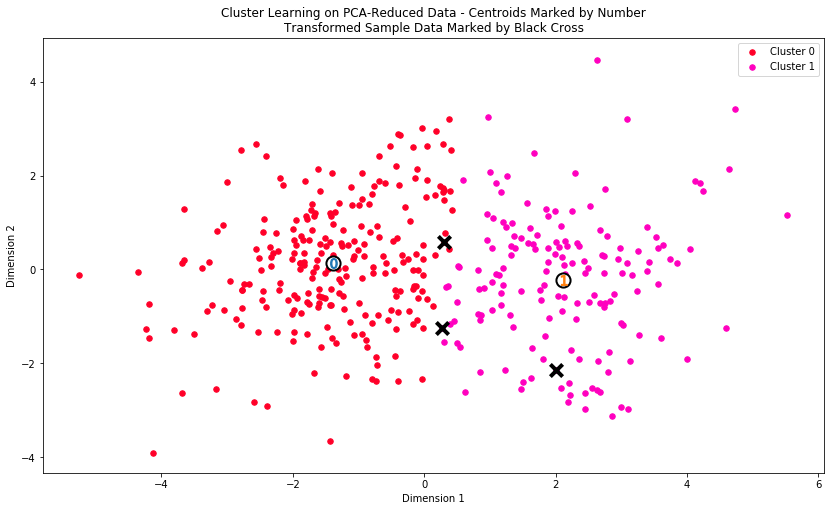

In [20]:
# Fit the clustering algorithm with the optimal number of clusters = 2
clusterer = KMeans(n_clusters=2, random_state=rs).fit(reduced_data)
# Predict with the optimal number of clusters
preds = clusterer.predict(reduced_data)
# Find the cluster centers with the optimal number of clusters
centers = clusterer.cluster_centers_
# Predict the cluster for each transformed sample data point with the optimal number of clusters
sample_preds = clusterer.predict(pca_samples)
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Clustering: Data Recovery
Each cluster present in the visualization above has a central point. These centers or means are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we'll recover the representative customer spending from these data points by applying the inverse transformations.

In [21]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


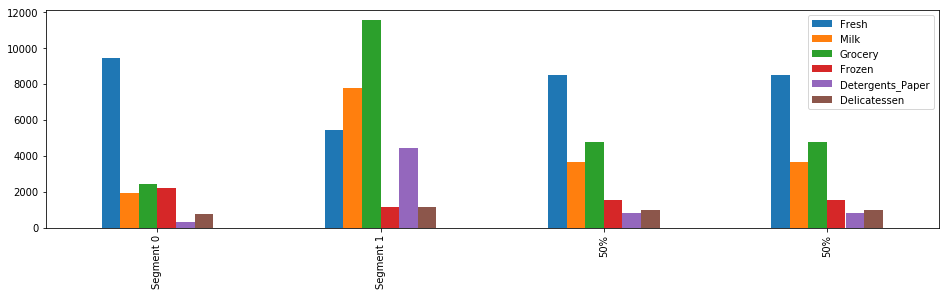

In [25]:
# Add median values for each feature to compare more easily with centroids
true_centers = true_centers.append(data.describe().loc['50%'])
# Plot true centers with median values for easier visualization
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Customer Segment Interpretation

Considering the total purchase cost of each product category for the representative data points above, and the statistical description of the dataset at the beginning of this project, the set of establishments that each of the customer segments may represent are:

- Segment 0's data suggests it represents medium-size fresh produce markets where the primary purchases are Fresh and Frozen. A typical client buys Fresh produce as its main product at an average of 9451, just above the median of 8504. Its Frozen purchases are in between the 50% and 75% quartiles.  All the other four features have values in between the 25-50% quartile.
- Segment 1's data suggests it represents large grocery stores where Grocery, Milk and Detergents_Paper are their main purchases. Their main product is Grocery at 11532 and buy all three categories above the 75% quartiles. Delicatessen (1136) is above the median (965). Fresh and Frozen are in between the 25-50% quartile.

### Sample Data Prediction

In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "\nSample point", i, "predicted to be in Cluster", pred
    # Display distance between sample points and centroids as additional information
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])


Sample point 0 predicted to be in Cluster 1
The distance between sample point 0 and center of cluster 1:
Fresh              -4736.0
Milk               -2289.0
Grocery             -441.0
Frozen              -290.0
Detergents_Paper    -205.0
Delicatessen        -700.0
dtype: float64

Sample point 1 predicted to be in Cluster 0
The distance between sample point 1 and center of cluster 0:
Fresh               -976.0
Milk                  -7.0
Grocery             -566.0
Frozen              2804.0
Detergents_Paper    3286.0
Delicatessen         216.0
dtype: float64

Sample point 2 predicted to be in Cluster 1
The distance between sample point 2 and center of cluster 1:
Fresh               20182.0
Milk                 3226.0
Grocery             -6928.0
Frozen               -996.0
Detergents_Paper    -3812.0
Delicatessen         -848.0
dtype: float64


### Sample Data Prediction: Analysis

* Sample point 0 is in Cluster 1 or the customer segment of Grocery, Milk and Detergents_Paper. The prediction for this sample point is consistent with the original conclusion arrived in Question 1 that the client is a primary purchaser of these three categories.   

* Sample point 1 is in Cluster 0 or the customer segment of Fresh and Frozen. Both of these categories are within the range of values of what was described for customer 1 in Question 1.  However, customer 1 is also an important purchaser of Detergents_Paper at the 75% quartile which the customer segment characterizes just above the 25% quartile. The prediction of sample point 1's customer segment is mostly consistent with its major product categories.  

* Sample point 2 is in Cluster 1 or the customer segment of Grocery, Milk and Detergents_Paper. Customer 2's major purchases are Fresh and Milk with only Milk agreeing with this customer segment by being above the 75% quartile. The client's Fresh consumption is well above the 75% quartile while the typical client in this cluster is in between the 25-50% quartiles. Its Grocery and Detergents_Paper consumptions are in between the 25-50% quartiles while this segment's values are above the 75% quartile. The prediction of sample point 2's customer segment is reasonably consistent with its major product categories.  

## Conclusions

In this final section, we investigate ways that can make use of the clustered data. First, we consider how the different customer segments may be affected differently by a specific delivery scheme. Next, we consider how giving a segment label to each customer can provide for additional features about the customer data. Finally, we compare the customer segments to variables dropped at the beginning of the project to see whether the clustering identified certain relationships.

### Service Delivery Impact 
The wholesale distributor considered changing its delivery service from 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. Using the customer segments and A/B tests we can determine which customers, if any, would react positively to the change in delivery service.

### Analysis

Out of the two clusters, we hypothesize that Segment 0 belonging to medium-size Fresh produce markets could react negatively to the change in delivery service. This is because markets typically do not stock up on fresh produce as they can with dry or canned goods and their medium sizes make them need more frequent deliveries to have full shelves and fresh products. On the other hand, Segment 1 of Grocery, Milk and Detergents_Paper are large grocery stores that have enough stock-room capacities to withstand a few days in-between deliveries of non-perishable products. They should also benefit with less operational handling of deliveries because of fewer delivery days.

The A/B test should be run in each customer segment where there is a control group with five-days-a-week delivery and a test group with three-days-a-week service.  Clients for each group should be chosen at random and each group should have the same size.  Having previously notified all clients involved so they can be ready, the testing period should last at least a month with frequent monitoring in case of customer disatisfaction. The measuring indicator should be weekly (or bimonthly) surveys where clients are asked about their satisfaction of the new delivery schedule. Once results are in, they should be analyzed to determine any pattern, to check against the initial hypotheses, revise the hypotheses and retest again (if necessary) to gain a deeper understanding of the customer segments. 

However, as we have seen with Sample Point 2, there are clients that seem to be a mix of both segments.  Client 2, whose primary consumptions are of Fresh and Milk, could react negatively to the reduced delivery schedule. Its Fresh purchases make it similar to clients in the segment of Fresh and Frozen but its large size may offset its need for a five day delivery, thus it could go either way. It's not easy to see how the client would react until the new delivery is proposed.  The A/B test should shed light on these marginal cases.  Even within Segment 1, which we assume most clients can switch to a 3 day delivery, the change may not be the liking of every client due to a variety of reasons. We can make exceptions on these customers to keep the 5-day delivery service on a one-by-one basis and feed this information back into the model. We can run a supervised learning algorithm to analyze the results since by then we'll have the labels of their satisfaction answers.  

Within each customer segment, if the results on the variation group is successful the change to a 3-day delivery can be rolled out to the rest of the clients in that segment. Otherwise, the tested 3-day can be reversed to the 5-day delivery. To make the distinction between success or not, we compare the test results against the control group's using a Z-test to determine a 5% statistical significance level (p-value) and a rejection or not of the null hypothesis (ie. no change in their means). A rejection means we'd switch to the new delivery schedule and an acceptance means we'd stay with the 5-day delivery.

### New Customer Prediction

### Analysis
The wholesale distributor can classify each new customer to a customer segment to determine the most appropriate delivery service using only their estimated product spending and the customer segment data. Since each customer has a customer segment it best identifies with, we can consider customer segment as an engineered feature for the data that can be used for additional analysis. 

The first step would be to add the resulting customer segments (or cluster number) to each data point in the original data set. Then we would run a supervised learner with the customer segment as the target variable and the annual spending of each product category as the features. With this fitted model, we'll run predictions using each new customer's estimated product spending to get its predicted customer segment label. 

From the analysis and results of the A/B tests, we have for each client its preference for a 3-day or 5-day service where a delivery schedule is not necessarily associated with only one customer segment.  As a second step, we'll run the supervised learner with the six product categories and the customer segment data as features.  We'll use a binary classification target variable where '0' is for 5-day delivery and '1' is for 3-day delivery. We fit the model then predict the new customer's delivery schedule using its anticipated annual spending and customer segment.

### Underlying Distribution Visualization

By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset. We can see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` in the reduced space.

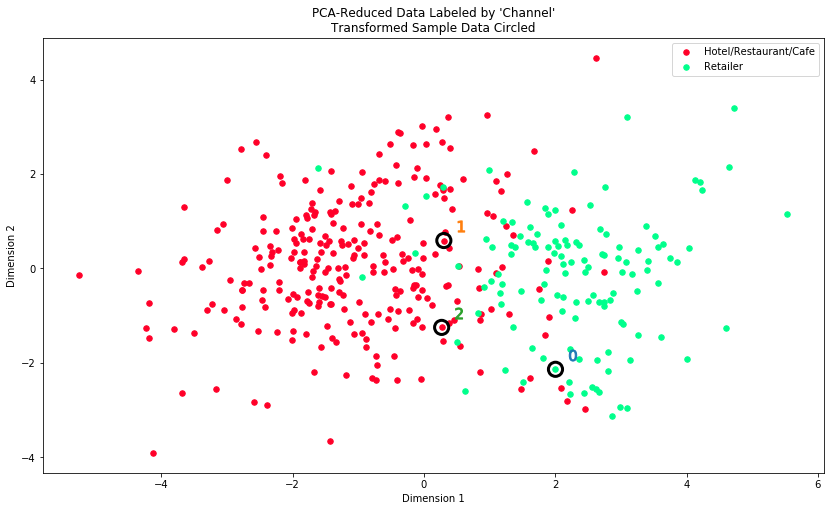

In [24]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Underlying Distribution Analysis

The K-means clustering algorithm and resulting 2 clusters match very well to the underlying distribution of Hotel/Restaurant/Cafe and Retailer customers.  The imaginary borderline (about 0.5 for Dimension 1) that separates cluster 0 and 1 is about where both distributions start becoming distinct, that is, where most of the distribution of Hotel/Restaurant/Cafe starts becoming dense and separates it from the Retailer group. On the Retailer side of the graph, there is an overlap of colored points that belong to both Channels in between 1 and 2 in Dimension 1 but overall the clustering algorithm has accounted correctly for most of the distributions in both segments.

There are irregular-shaped patches of the distribution, within each cluster, that look purely 'Retailers' or 'Hotels/Restaurants/Cafes'.  On the upper right (near the biplot axis Grocery, Milk) and lower right areas (near the biplot axis Detergents_Paper), those data points (between 3 and 5 in Dimension 1 and bewtween 4 and -4 in Dimension 2) are purely Retailers, and on the center left and lower left areas those data points (between -1 and -6 in Dimension 1 and between 2 and -4 in Dimension 2) are purely Hotels/Restaurants/Cafes. However, none of the two customer segments can be considered purely one or the other.

Having said that, these two classifications are still consistent with the previous definitions of customer segments. Inside each Channel region, there are a mix of data points (evidenced by their colors), some belonging to the other channel but mostly belonging to one channel. The 'foreign' data points are a few establishments whose main product categories fit mainly with the assigned segment and have a few categories that fit less significantly with the other one (eg. sample point 2).  We should be mindful that we're using two dimensions out of six that explain 72.53% of the variance of the data. If we were to expand the dimensions, we could explain more of the variations but would have a harder time plotting the visualizations and doing the analysis.  In short, the two resulting clusterings are simplifications which are mostly correct. 